In [7]:
import pandas as pd;
import numpy as np;
import tensorflow as tf;
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 텐서플로를 사용하면서 에러를 잡아주기 위한...

# Data Loading
from tensorflow.keras.datasets.mnist import load_data;
(x_train, y_train),(x_test, y_test) = load_data(path='mnist.npz');

x_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [8]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
x_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# Show image
import matplotlib.pyplot as plt;
img = x_train[0, :];
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

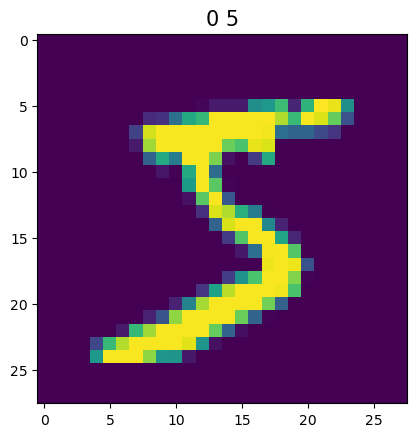

In [13]:
label = y_train[0];
plt.figure();
plt.imshow(img);
plt.title('%d %d' % (0, label), fontsize=15);
plt.show();

In [14]:
# 훈련 / 검증 데이터로 분리
# 데이터 정규화
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import MinMaxScaler;

x_train, x_vali, y_train, y_vali = train_test_split(x_train, y_train,
                                                    test_size=0.3,
                                                    random_state=777
                                                    );
print(x_train.shape, y_train.shape)
print(x_vali.shape, y_vali.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [15]:
x_train_scaler = MinMaxScaler().fit_transform(x_train)# minmax scaler는 3차원은 안됨.

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.